<a href="https://colab.research.google.com/github/RolandTapie/Data_Projects/blob/main/Data_science/Bank/Bank_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonction

In [150]:
def summary(liste,section,libelle,valeur):
  liste.append([len(liste)+1,section,libelle,valeur])
  return (liste)

def print_summary(data):
  headers = data[0]
  table_data = data[1:]
  print(tabulate(table_data, headers, tablefmt="grid"))

**Import des packages**

In [151]:
#!pip install nxviz

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#import nxviz as nv
import missingno as msno
from itertools import combinations
from tabulate import tabulate



from scipy.stats import iqr
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from google.colab import drive

**Montage du drive**

In [153]:
#drive.mount('/content/drive', force_remount=True)

**Lecture du dataset**

In [154]:
file_path="https://raw.githubusercontent.com/RolandTapie/Data_Projects/refs/heads/main/Data_science/Datasets/bank_cleaned.csv"
df = pd.read_csv(file_path)
resume=[]
resume=summary(resume,"Section","libelle","information")
resume=summary(resume,"Dataset","Path",file_path)

In [155]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

**Renommage des colonnes**

In [156]:
cible = "response"
feat=['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'response_binary']
feat=['age', 'balance','duration', 'campaign','pdays','loan']
one_hot_enconding=["job","marital","education","default","housing","loan","month","poutcome"]
one_hot_enconding=['loan']


**Description du dataset**

In [157]:
df.describe()
resume=summary(resume,"Dataset","taille", str(len(df)) + " observations")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

**Traiter le type des données**

In [159]:
for col in df.columns:
  if "Unnamed" in col:
    df=df.drop(col,axis=1)

colonnes=df.columns.tolist()

print("Les champs du Dataset")
print(colonnes)
compteur=0
for col in colonnes:
  if df[col].dtype=="object":
    df[col]=df[col].astype("category")
    compteur+=1

    print(f'les données du champ {col} de type {df[col].dtype} ont été changées en type category')
    print('\n')
    print('Avec les valeurs ci-dessous:')
    print('\n')
    print(df[col].unique())
    print('\n')
resume=summary(resume,"Dataset","Nombre de champs de type object tranformés en category",compteur)

liste_cat=[col for col in df.columns if df[col].dtype=="category"]

resume=summary(resume,"Dataset","Nombre de champs de type category",compteur)
liste_float_int=[col for col in df.columns if ((df[col].dtype=="int64")|(df[col].dtype=="float64"))]

print("*"*100)
print('la liste des champs de type float ou int')
print (liste_float_int)
resume=summary(resume,"Dataset","champs de type float ou int",(liste_float_int))
print("*"*100)
print('la liste des champs de type category')
print (liste_cat)
resume=summary(resume,"Dataset","champs de type category",(liste_cat))

Les champs du Dataset
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'response_binary']
les données du champ job de type category ont été changées en type category


Avec les valeurs ci-dessous:


['management', 'technician', 'entrepreneur', 'retired', 'admin.', ..., 'self-employed', 'unemployed', 'housemaid', 'student', 'other']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'services',
                          'student', 'technician', 'unemployed']


les données du champ marital de type category ont été changées en type category


Avec les valeurs ci-dessous:


['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


les données du champ education de type category ont été changées en type category


Avec les valeurs ci-dessous:


['tertiary', 'secondary', 'primary']
Categories (3, o

**Vérification des enrigistrements nulls**

In [160]:
df.isna().any().sum()
resume=summary(resume,"Dataset","Nombre de valeurs nulles",df.isna().any().sum())

Vérification des doublons

In [161]:
df.duplicated().sum()
resume=summary(resume,"Dataset","Nombre de doublons",df.duplicated().sum())

<Axes: >

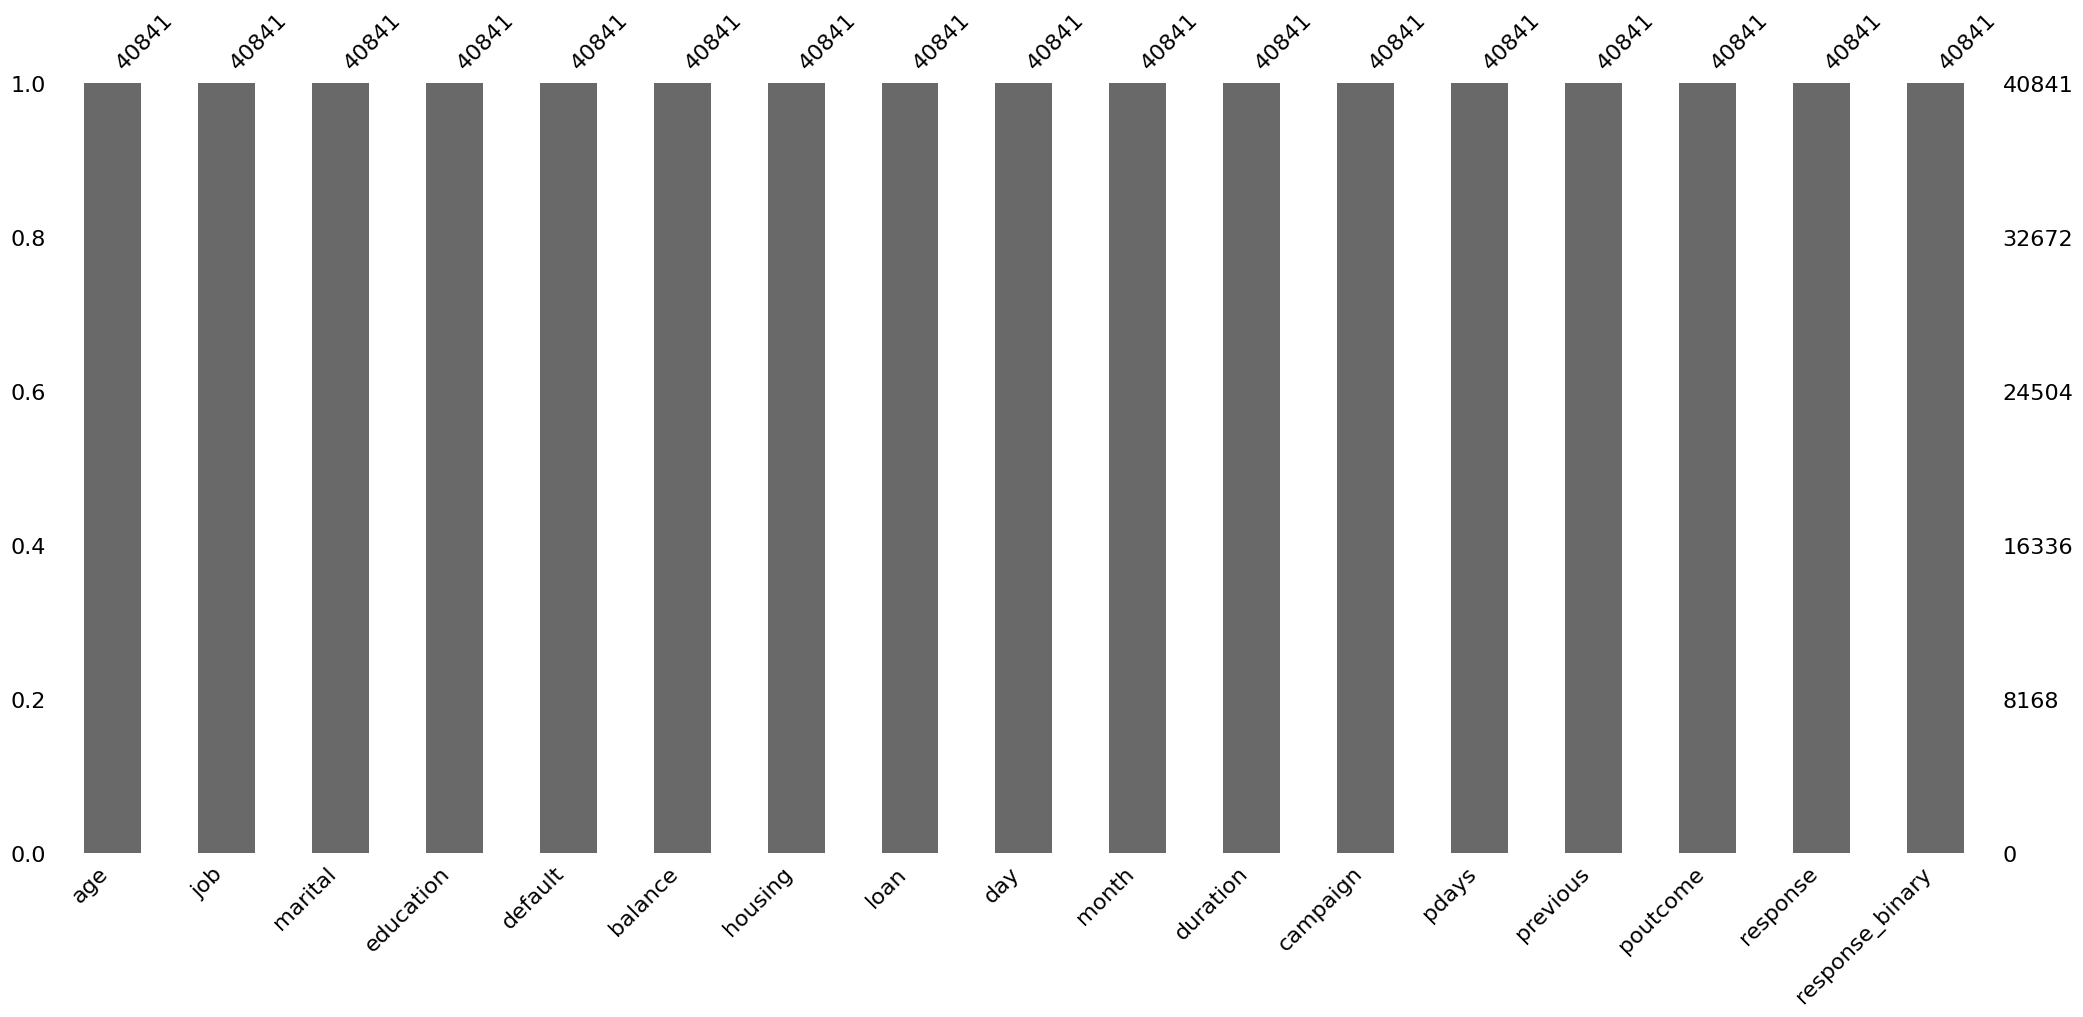

In [162]:
msno.bar(df)

<Axes: >

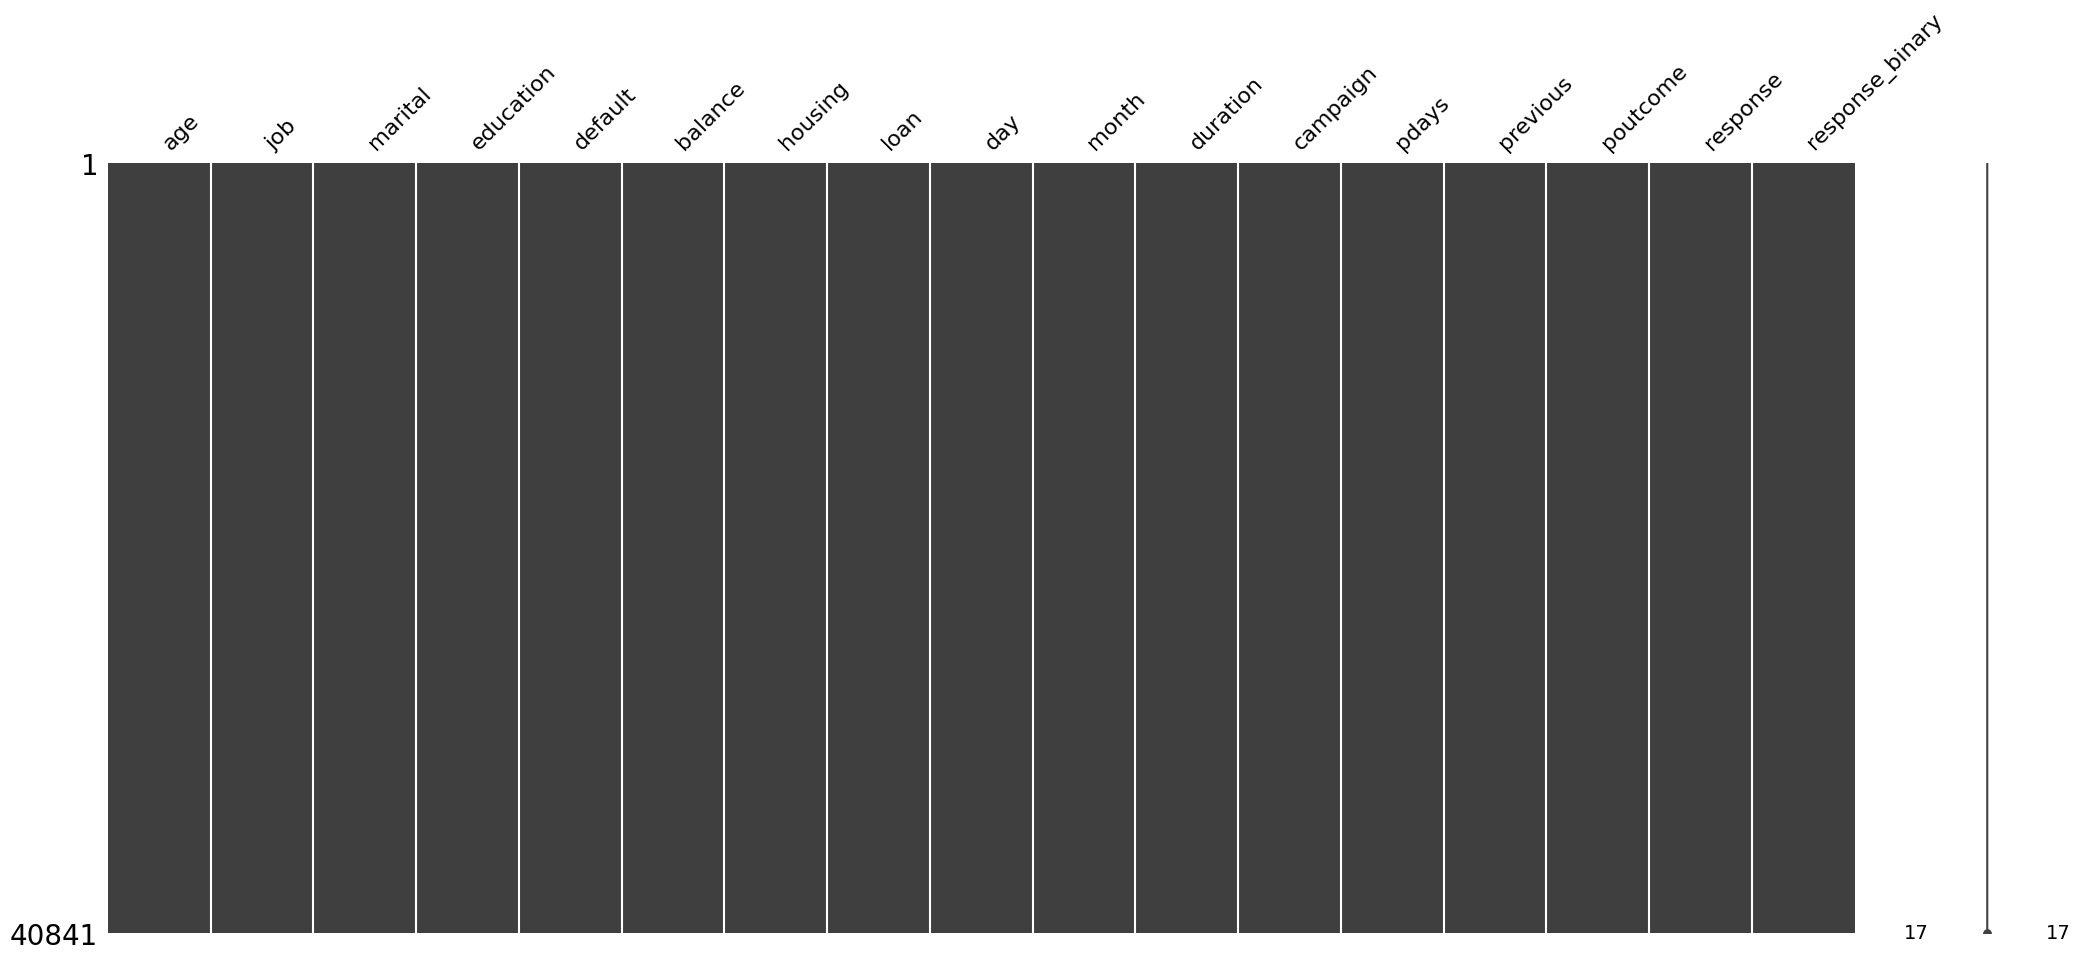

In [163]:
msno.matrix(df)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

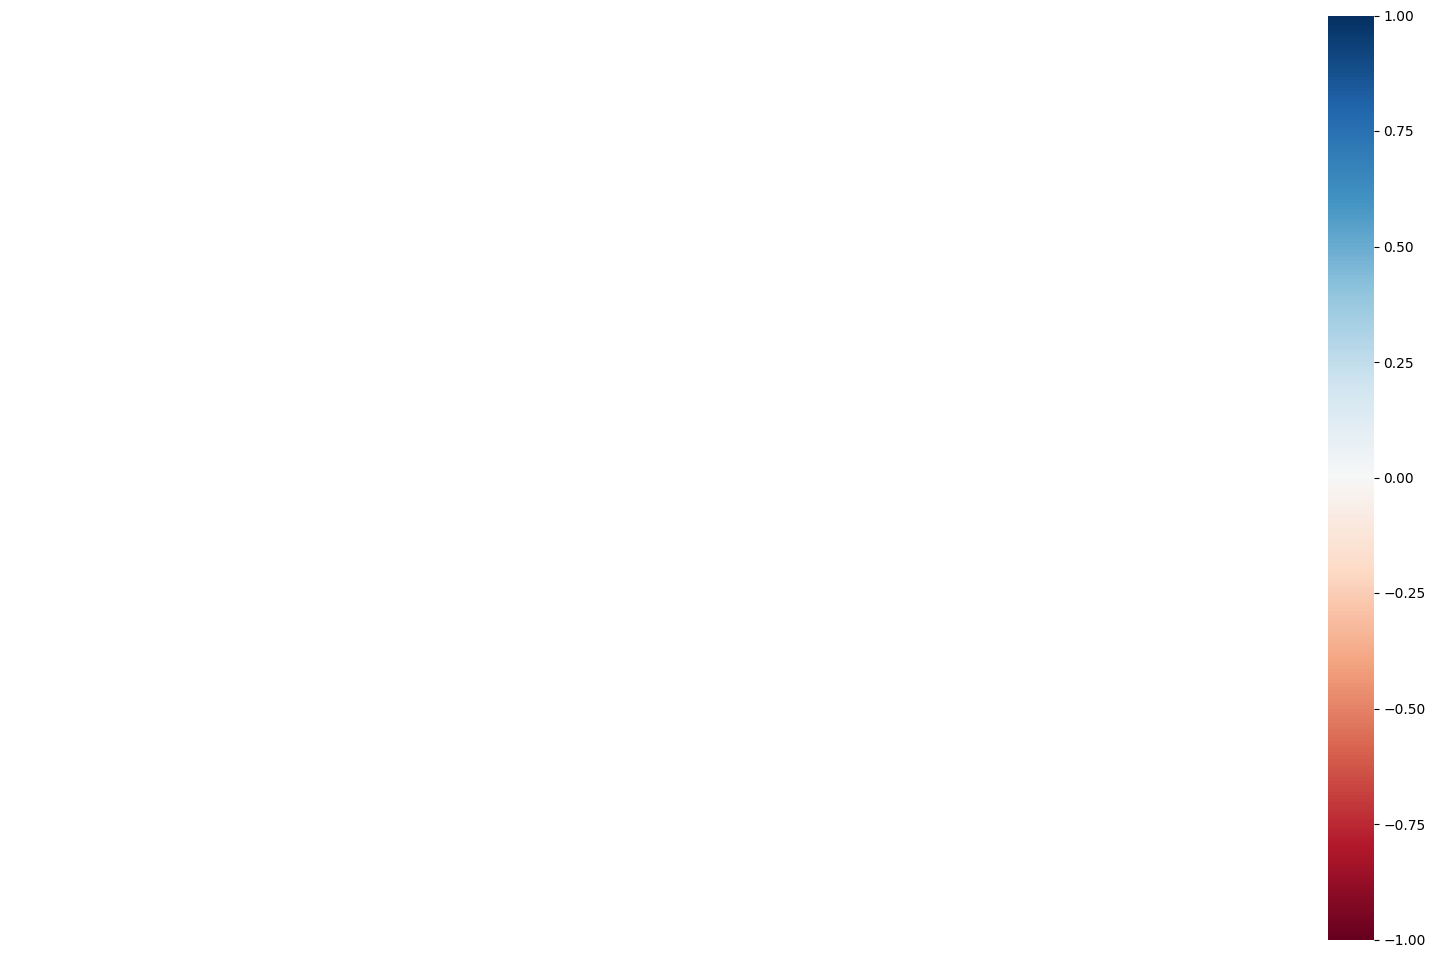

In [164]:
msno.heatmap(df)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

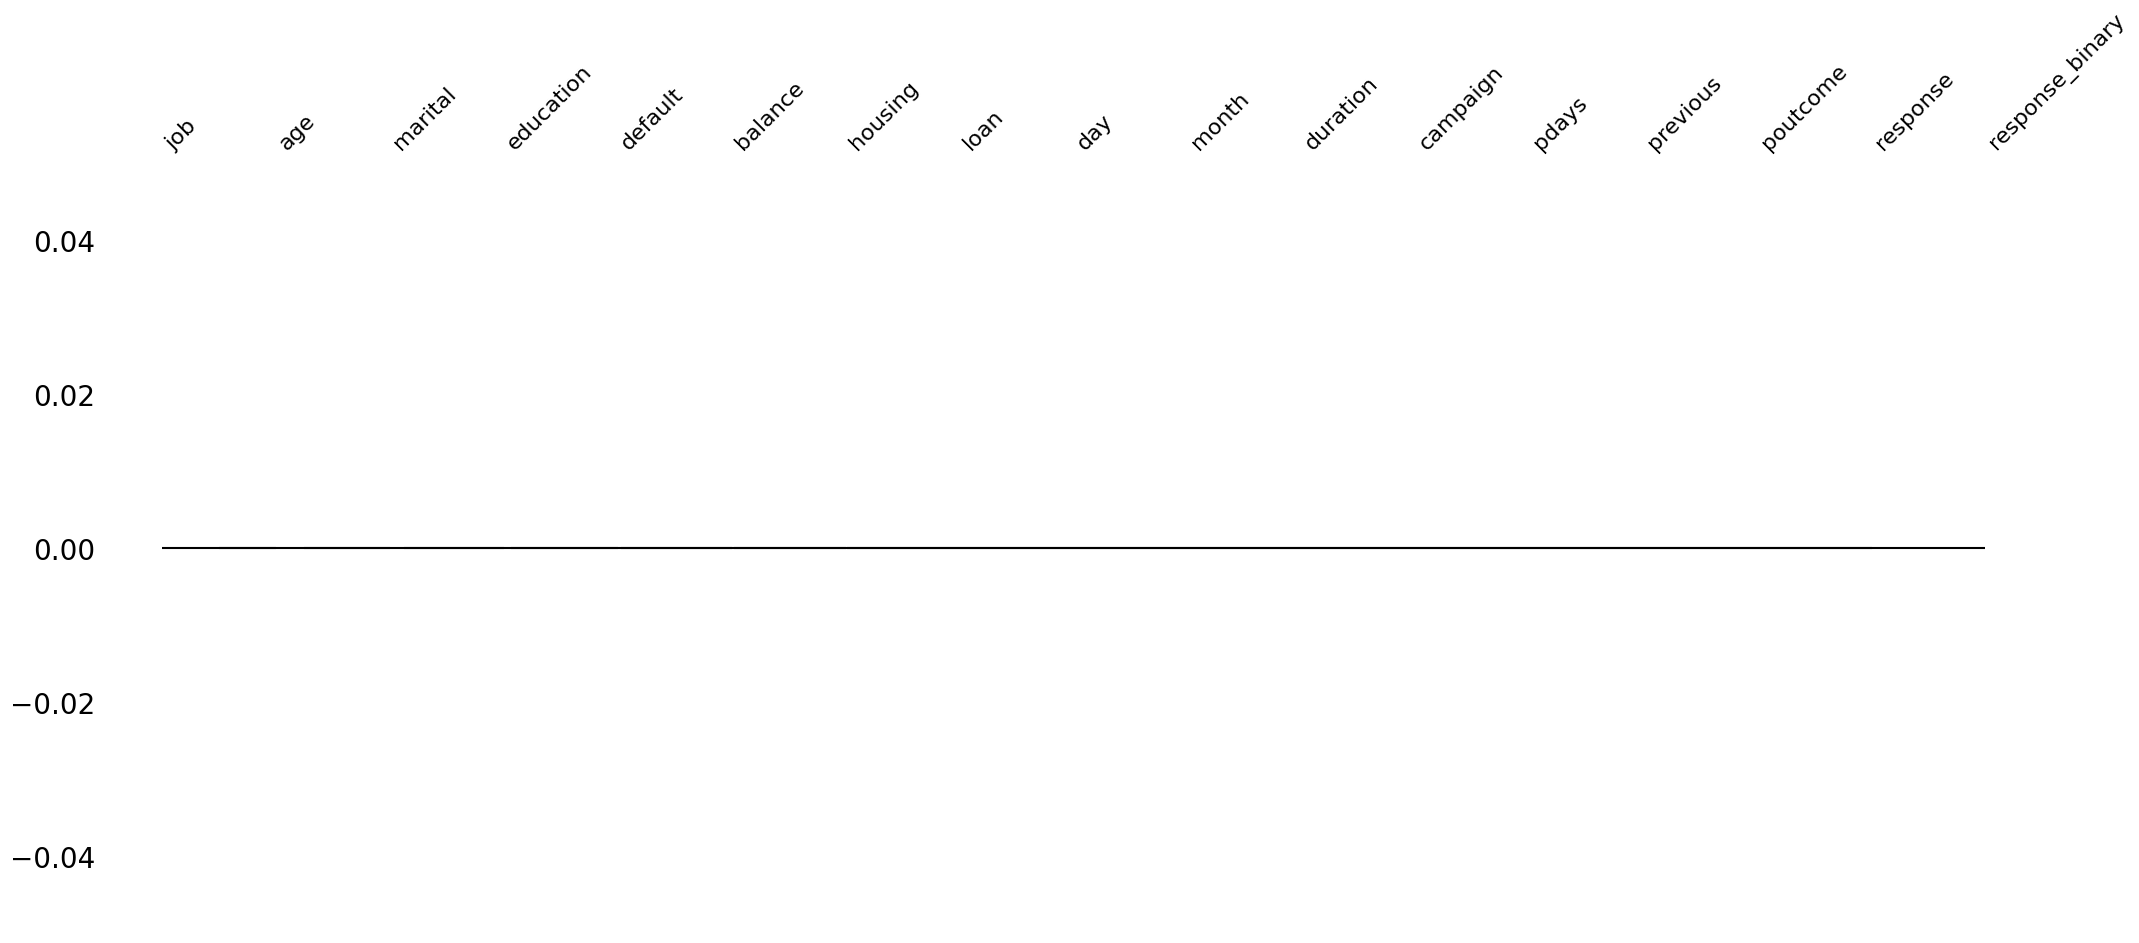

In [165]:
msno.dendrogram(df)

In [166]:
# Supprimer les lignes où toutes les valeurs sont manquantes
df= df.dropna(how='all')

In [167]:
print(len(df))

40841


# **EDA**

Analyse des données catégorielles

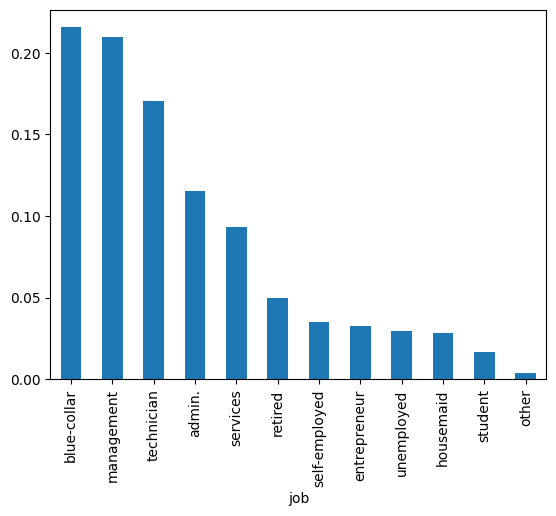

****************************************************************************************************
job
blue-collar      0.22
management       0.21
technician       0.17
admin.           0.12
services         0.09
retired          0.05
self-employed    0.04
entrepreneur     0.03
unemployed       0.03
housemaid        0.03
student          0.02
other            0.00
Name: proportion, dtype: float64


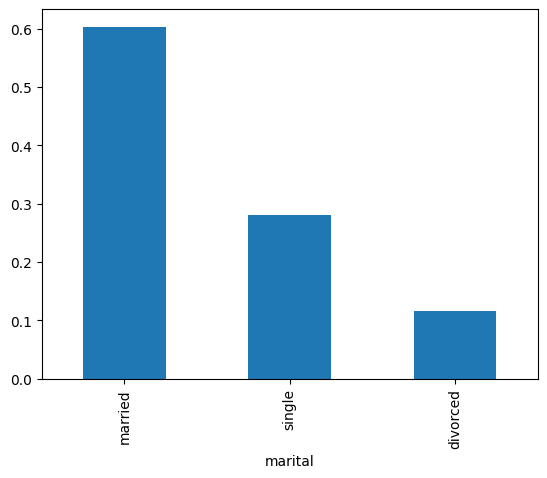

****************************************************************************************************
marital
married     0.60
single      0.28
divorced    0.12
Name: proportion, dtype: float64


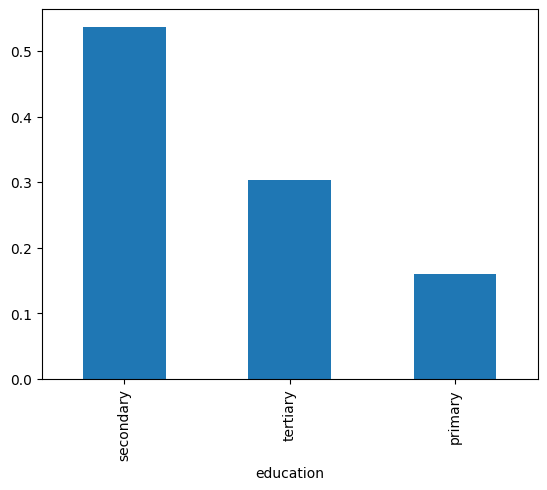

****************************************************************************************************
education
secondary    0.54
tertiary     0.30
primary      0.16
Name: proportion, dtype: float64


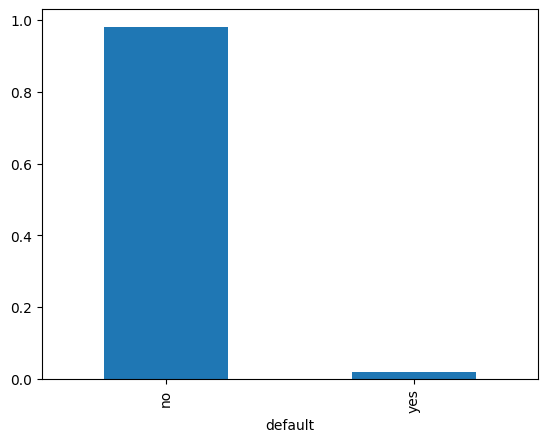

****************************************************************************************************
default
no     0.98
yes    0.02
Name: proportion, dtype: float64


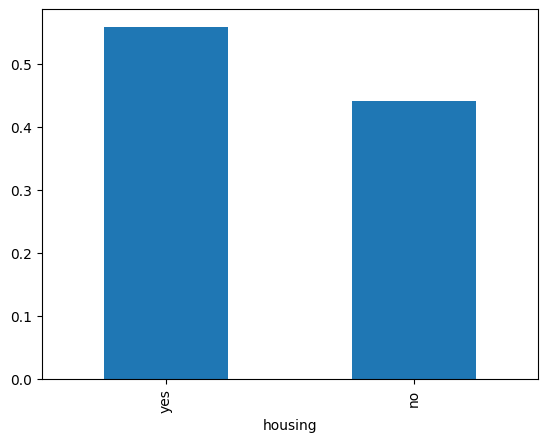

****************************************************************************************************
housing
yes    0.56
no     0.44
Name: proportion, dtype: float64


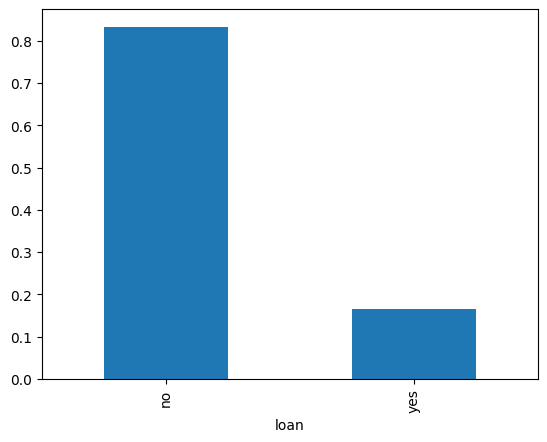

****************************************************************************************************
loan
no     0.83
yes    0.17
Name: proportion, dtype: float64


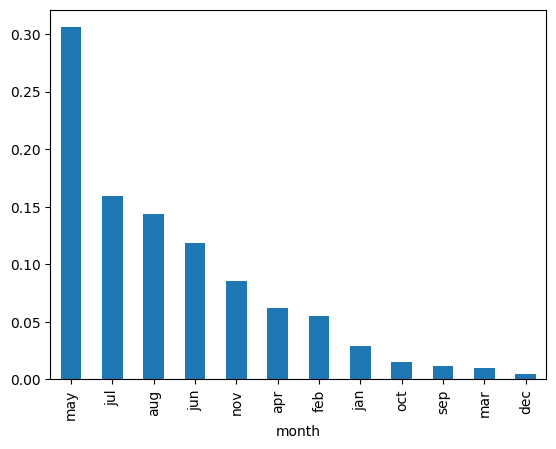

****************************************************************************************************
month
may    0.31
jul    0.16
aug    0.14
jun    0.12
nov    0.09
apr    0.06
feb    0.06
jan    0.03
oct    0.01
sep    0.01
mar    0.01
dec    0.00
Name: proportion, dtype: float64


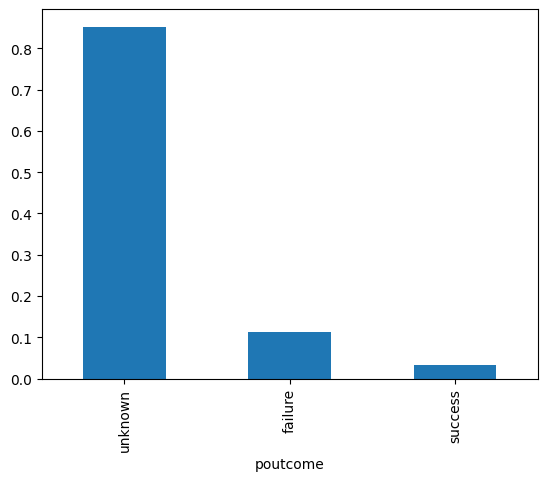

****************************************************************************************************
poutcome
unknown    0.85
failure    0.11
success    0.03
Name: proportion, dtype: float64


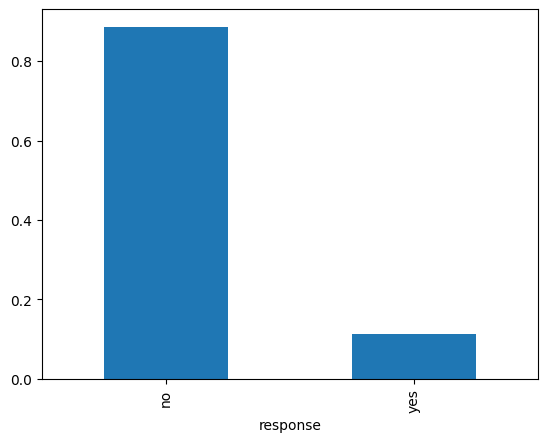

****************************************************************************************************
response
no     0.89
yes    0.11
Name: proportion, dtype: float64


In [176]:
df_cat=df[liste_cat]
analyse=""
for col in liste_cat:
  #print(df_cat[col].value_counts(normalize=True))
  analyse=analyse+col+'\n'
  analyse=analyse+("*"*10)+'\n'
  analyse=analyse+str(df_cat[col].value_counts(normalize=True).round(2))+'\n'
  df_cat[col].value_counts(normalize=True).plot(kind='bar')
  plt.show()
  print("*"*100)
  print(df_cat[col].value_counts(normalize=True).round(2))
resume=summary(resume,"EDA","Analyse des données catégorielles",analyse)

## **Vérifications des distributions**

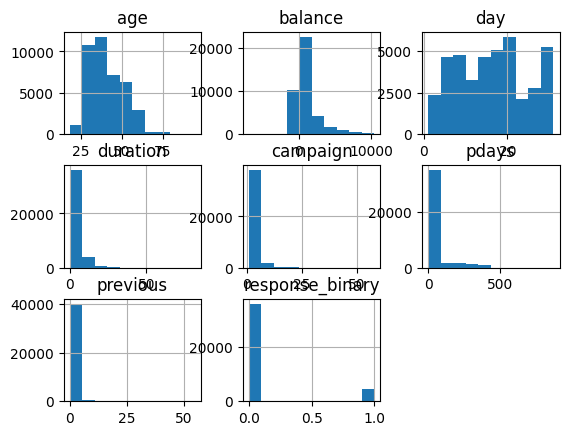

In [169]:
df_num=df[liste_float_int]
df_num.hist()
plt.show()

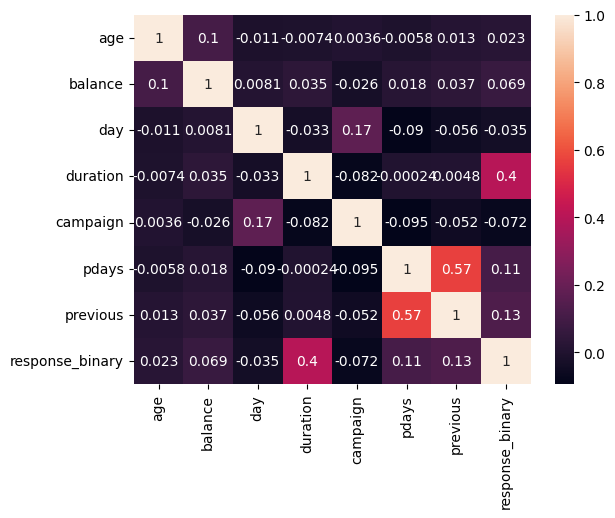

****************************************************************************************************
Liste des corrélations à analyser
****************************************************************************************************
duration > response_binary : 0.401
pdays > previous : 0.568
previous > pdays : 0.568
response_binary > duration : 0.401


In [170]:
df_corr=df_num.corr()
sns.heatmap(df_corr,annot=True)
plt.show()
corr_limit=0.4
liste=[]
corr_check=[]
for i in range(len(df_corr)):
  for j in range(len(df_corr)):
    if (abs(df_corr.iloc[i,j])>=corr_limit)&(i!=j):
        corr_check.append((str(df_corr.columns[i])+ " > " + str(df_corr.columns[j])+ " : " + str(round(df_corr.iloc[i,j],3))))

print("*"*100)
print("Liste des corrélations à analyser")
print("*"*100)
for cor in corr_check:
  print(cor)

resume=summary(resume,"EDA","corrélations à analyser",(corr_check))

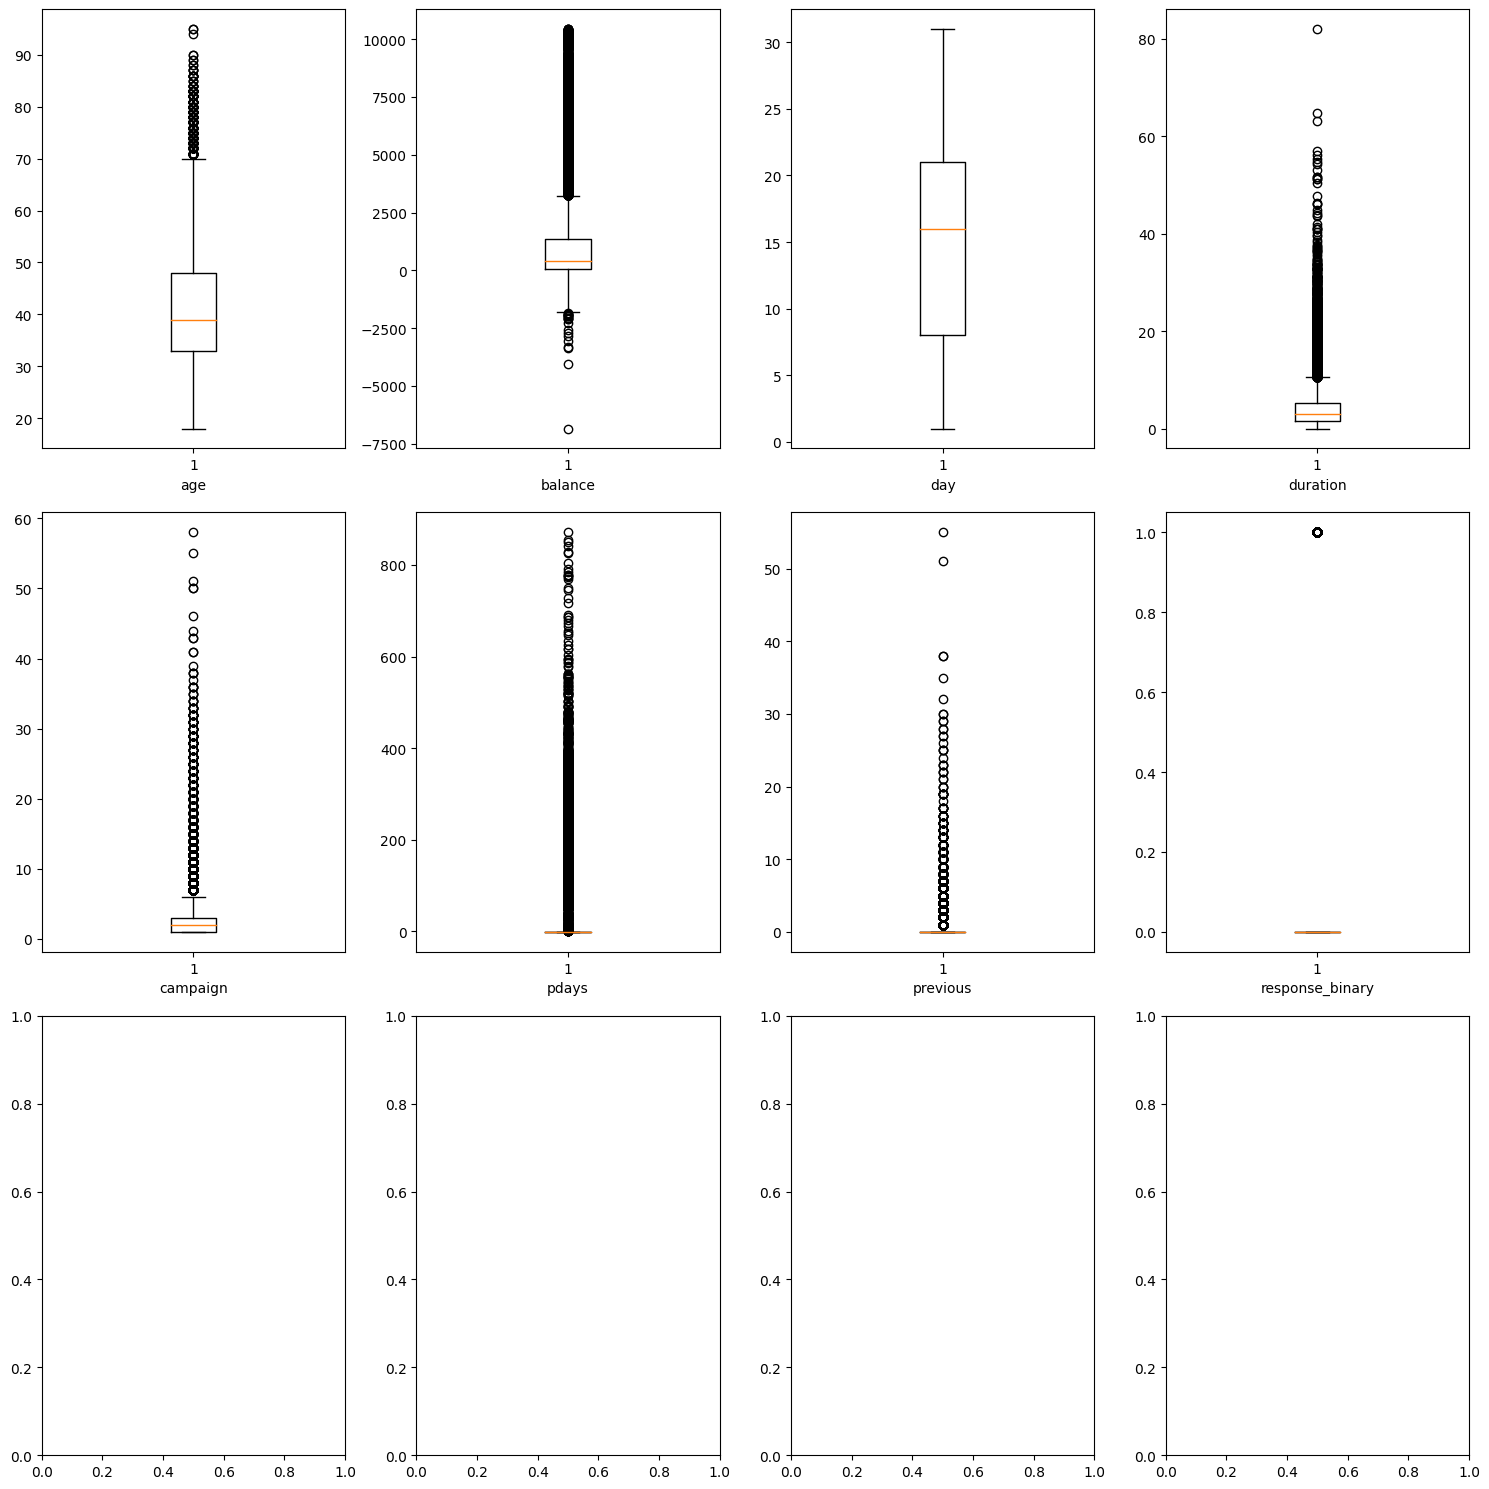

In [171]:
size=len(liste_float_int)
fig, axes = plt.subplots((size//4)+1, 4, figsize=(15, 15))
axes=axes.flatten()
for i, cols in enumerate(liste_float_int):
  axes[i].boxplot(df[cols])
  axes[i].set_xlabel(cols)
plt.tight_layout()
plt.show()

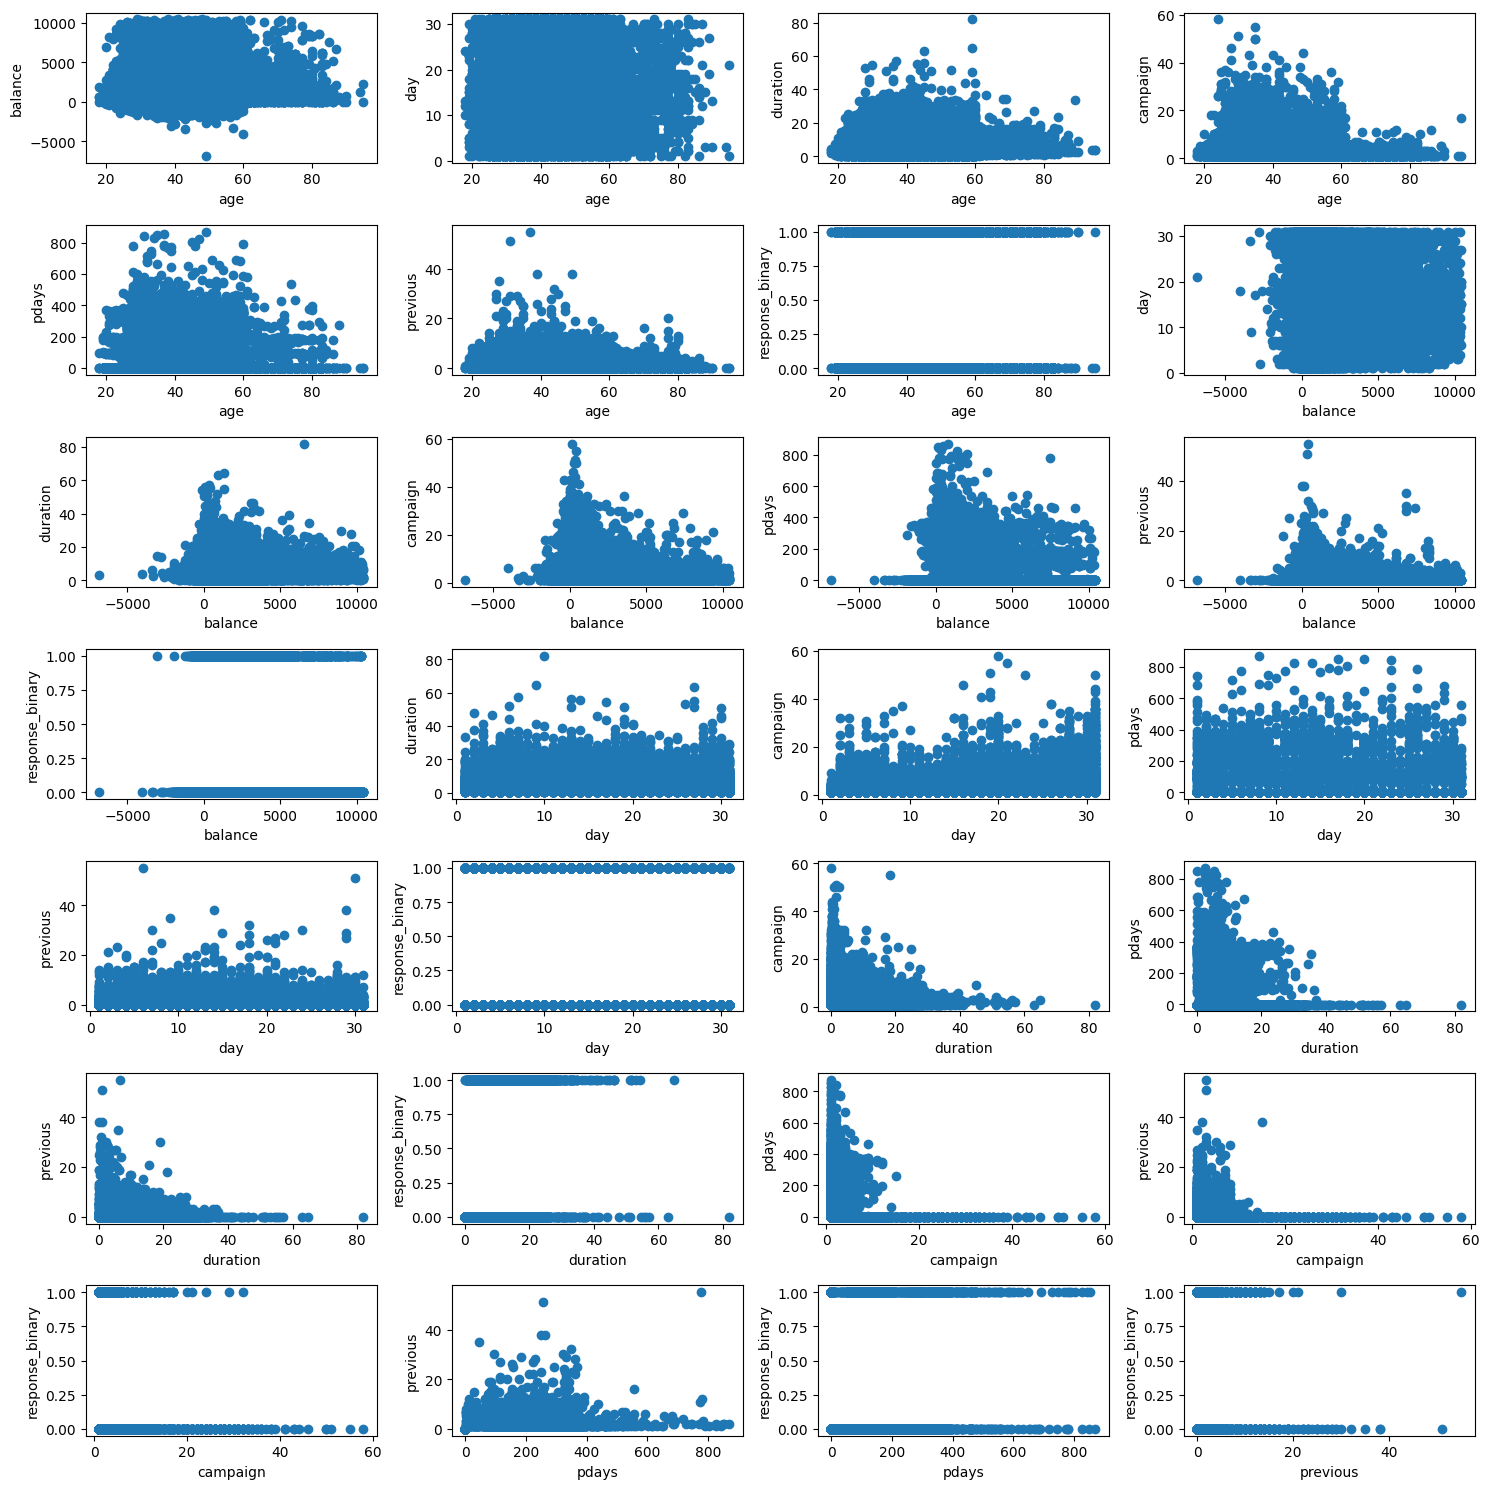

In [172]:
size=len(list(combinations(liste_float_int,2)))
fig, axes = plt.subplots(size//4, 4, figsize=(15, 15))
axes=axes.flatten()
for i, cols in enumerate(combinations(liste_float_int,2)):
  axes[i].scatter(df[cols[0]], df[cols[1]])
  axes[i].set_xlabel(cols[0])
  axes[i].set_ylabel(cols[1])
plt.tight_layout()
plt.show()

Vérifications des valeurs abérantes

In [173]:
outliers=""
for col in liste_float_int:
  if df[col].nunique()>=5:
    inf=df[col].quantile(0.25)-1.5*iqr(df[col])
    sup=df[col].quantile(0.75)+1.5*iqr(df[col])
    df_outliers=df[(df[col]<inf) | (df[col]>sup)][col]
    outliers=outliers + "la colonne " + col + " contient "+ str(len(df_outliers))+ " outliers pour un iqr de " + str(iqr(df[col])) +'\n'
    df[col]=np.where(df[col]>sup,sup,df[col])
    df[col]=np.where(df[col]<inf,inf,df[col])
    print(df_outliers)
    print("*"*100)
resume=summary(resume,"EDA","valeurs aberantes avant correction",f"valeurs abérantes :"+"\n" + str(outliers))

27220    83
27309    75
27311    75
27361    83
27821    75
         ..
40798    71
40823    75
40835    73
40838    71
40839    72
Name: age, Length: 394, dtype: int64
****************************************************************************************************
55       6530
59       5935
166      4080
183      5699
214      3237
         ... 
40813    3409
40814    6879
40818    4256
40823    3810
40839    5715
Name: balance, Length: 4031, dtype: int64
****************************************************************************************************
Series([], Name: day, dtype: int64)
****************************************************************************************************
32       27.77
37       24.87
46       13.12
50       29.63
52       13.53
         ...  
40745    11.93
40769    11.68
40831    25.93
40837    16.28
40839    18.78
Name: duration, Length: 2970, dtype: float64
**************************************************************************************

In [174]:
outliers=""
for col in liste_float_int:
  if df[col].nunique()>=5:
    inf=df[col].quantile(0.25)-1.5*iqr(df[col])
    sup=df[col].quantile(0.75)+1.5*iqr(df[col])
    df[col]=np.where(df[col]>sup,sup,df[col])
    df[col]=np.where(df[col]<inf,inf,df[col])
    df_outliers=df[(df[col]<inf) | (df[col]>sup)][col]

    if len(df_outliers)>0:
      outliers= outliers + "la colonne " + col + " contient encore  "+ str(len(df_outliers))+ " outliers pour un iqr de " + str(iqr(df[col])) +'\n'
      print(df_outliers)
      print("*"*100)

resume=summary(resume,"EDA","valeurs aberantes après correction",f"valeurs abérantes :"+"\n" + str(outliers))

In [175]:
print_summary(resume)

+-----+-----------+--------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------+
|   1 | Section   | libelle                                                | information                                                                                                                          |
+=====+===========+========================================================+======================================================================================================================================+
|   2 | Dataset   | Path                                                   | https://raw.githubusercontent.com/RolandTapie/Data_Projects/refs/heads/main/Data_science/Datasets/bank_cleaned.csv                   |
+-----+-----------+--------------------------------------------------------+----------------------------------------------------------------------------

Détection des valeurs abérantes

In [ ]:
df_corr=df[liste]
df_corr.describe()
for col in liste:
  print(col)
  print(iqr(df_corr[col]))

In [ ]:
for col in liste:
  print(col)
  plt.figure(figsize=(10,5))
  plt.boxplot(df[col])
  plt.show()

**Vérification des Corrélations**

**Lecture du dataset**

In [ ]:
features=df.drop("response", axis=1)
features = df[liste].values
targets=df["response_binary"].values
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
logreg=LogisticRegression(solver='lbfgs', max_iter=100)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred_proba=logreg.predict_proba(X_test)[:,1]
print(y_pred)
print(y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
features = df[feat]
features=pd.get_dummies(features,columns=one_hot_enconding,dtype=float, drop_first=True)
targets = df[cible]
targets=pd.get_dummies(targets,"response", drop_first=True,dtype=float)
features_train = features_train.select_dtypes(exclude=['object'])

NameError: name 'df' is not defined

In [ ]:
features.info()
targets.info()

In [ ]:
features = sm.add_constant(features)

In [ ]:
features_train, features_test, targets_train, targets_test = train_test_split(features, targets,test_size=0.2, random_state=42)

In [ ]:
features_train.info()
targets_train.info()

In [ ]:
logit_model = sm.Logit(targets_train, features_train)

In [ ]:
result = logit_model.fit()

In [ ]:
print(result.summary())

# Nouvelle section

# Nouvelle section